In [132]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

# Ignore all warnings
warnings.filterwarnings("ignore")

In [133]:
# Load the dataset
data = pd.read_csv('supermarket_sales.csv')

In [134]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [135]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [136]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [137]:
data.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

In [138]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [139]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [140]:
data.size

17000

In [141]:
data.shape

(1000, 17)

In [142]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

In [143]:
# Handle missing values by forward fill (or backfill if necessary)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

In [144]:
# Handle outliers using Z-score (removing data beyond 3 standard deviations)
data['z_score'] = np.abs(stats.zscore(data['Total']))
data = data[data['z_score'] < 3]

In [145]:
# Drop the Z-score column after filtering
data.drop(columns=['z_score'], inplace=True)

In [146]:
# Aggregate total sales by date
daily_sales = data.groupby('Date').agg({'Total': 'sum'}).reset_index()

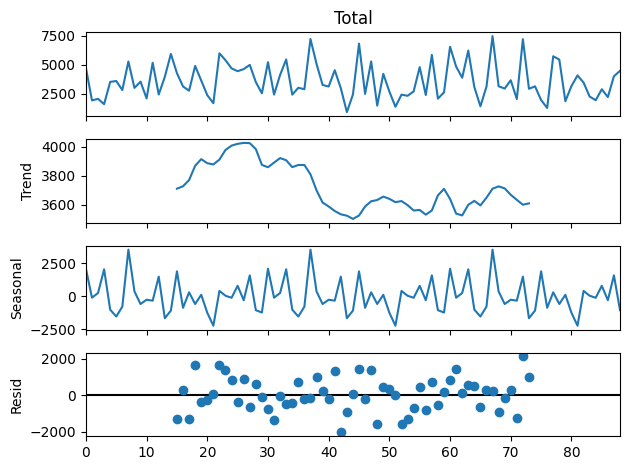

In [147]:
# Decompose the series to check for seasonality
decomposition = seasonal_decompose(daily_sales['Total'], model='additive', period=30)
decomposition.plot()
plt.show()

In [148]:
# Rename columns for Prophet
daily_sales.columns = ['ds', 'y']

In [149]:
# Create a list of holidays (e.g., New Year's Day, Christmas, etc.)
holidays = pd.DataFrame({
    'holiday': ['New Year\'s Day', 'Christmas', 'Good Friday', 'Labor Day'],
    'ds': pd.to_datetime(['2019-01-01', '2019-12-25', '2019-04-19', '2019-05-01']),  # Add public holidays
    'lower_window': 0,
    'upper_window': 1,
})

In [150]:
# Initialize the Prophet model and add holidays
model = Prophet(holidays=holidays)
model.add_country_holidays(country_name='ZA')  # Adding South African holidays
model.add_seasonality(name='weekly', period=7, fourier_order=3)  # Add weekly seasonality for weekends


In [151]:
# Fit the model with the daily sales data
model.fit(daily_sales)

11:16:08 - cmdstanpy - INFO - Chain [1] start processing
11:16:08 - cmdstanpy - INFO - Chain [1] done processing


In [152]:
model.component_modes

{'additive': ['weekly',
  "New Year's Day",
  'Christmas',
  'Good Friday',
  'Labor Day',
  'Family Day',
  'Day of Reconciliation',
  'Christmas Day',
  'Day of Goodwill',
  'Human Rights Day',
  'Freedom Day',
  "Workers' Day",
  'Youth Day',
  'Youth Day (observed)',
  "National Women's Day",
  'Heritage Day',
  'National and provincial government elections',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [153]:
# Create future dates for forecasting (next 30 days)
future = model.make_future_dataframe(periods=30)

In [154]:
future.tail()

,ds
114,2019-04-25
115,2019-04-26
116,2019-04-27
117,2019-04-28
118,2019-04-29


In [155]:
# Make the forecast
forecast = model.predict(future)

In [156]:
# Display the forecasted data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds         yhat   yhat_lower   yhat_upper
114 2019-04-25  3467.343633  1588.006062  5316.980048
115 2019-04-26  3229.886045  1433.188675  5086.685553
116 2019-04-27  4168.016835  2338.409865  6003.592901
117 2019-04-28  3548.344509  1751.399714  5213.402214
118 2019-04-29  3001.722262  1258.136020  4806.503565


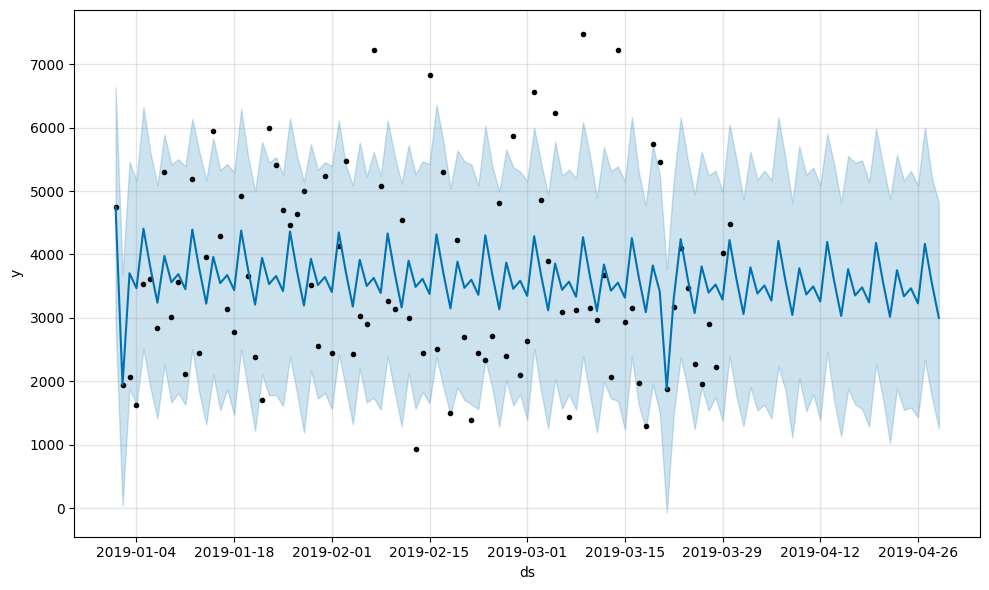

In [157]:
# Plot the forecast
fig = model.plot(forecast)
plt.show()

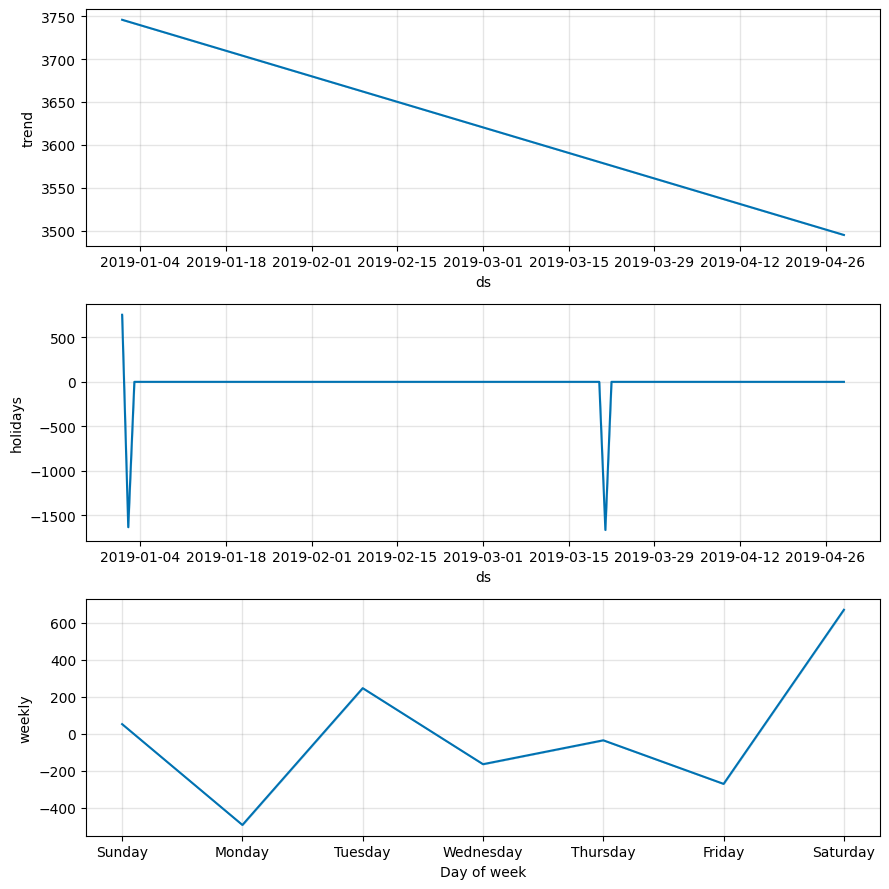

In [158]:
# Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()